In [ ]:
# Installing Libs
!pip install yfinance
!pip install tfcausalimpact

In [48]:
# Importing the Lib's
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Dates
training_start = '2014-01-06'
training_end = '2015-08-31'
treatment_start = '2015-09-07'
treatment_end = '2015-09-28'
end_stock = '2015-10-02'

In [77]:
y = ['VOW3.DE']
y = yf.download(tickers = y,
                start = training_start,
                end = end_stock,
                interval = '1wk')
y

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,200.149994,200.800003,197.050003,200.000000,118.257912,1154326
2014-01-08,200.199997,204.449997,194.550003,197.800003,116.957085,4058743
2014-01-15,199.699997,204.350006,198.550003,202.600006,119.795288,3670877
2014-01-22,203.600006,203.899994,188.149994,195.550003,115.626678,4811857
2014-01-29,198.000000,198.100006,179.149994,183.399994,108.442505,5776739
...,...,...,...,...,...,...
2015-09-02,164.699997,168.500000,160.800003,166.949997,103.043961,6356802
2015-09-09,171.000000,172.449997,165.600006,169.199997,104.432701,5509674
2015-09-16,170.350006,171.449997,101.349998,106.000000,65.424736,33582784


In [78]:
y = y['Adj Close']
y

Date
2014-01-01    118.257912
2014-01-08    116.957085
2014-01-15    119.795288
2014-01-22    115.626678
2014-01-29    108.442505
                 ...    
2015-09-02    103.043961
2015-09-09    104.432701
2015-09-16     65.424736
2015-09-23     58.758827
2015-09-30     57.005932
Name: Adj Close, Length: 92, dtype: float64

In [79]:
y = y.rename("y")
y.tail()

Date
2015-09-02    103.043961
2015-09-09    104.432701
2015-09-16     65.424736
2015-09-23     58.758827
2015-09-30     57.005932
Name: y, dtype: float64

# Stock

In [80]:
stocks = ['PAH3.DE','BMW.DE','MBG.DE','FMC1.DE']
x = yf.download(tickers = stocks,
                start = training_start,
                end = end_stock,
                interval = '1wk')

x.head()

[*********************100%%**********************]  4 of 4 completed


Adj Close                                      Close          \
               BMW.DE   FMC1.DE     MBG.DE    PAH3.DE     BMW.DE FMC1.DE   
Date                                                                       
2014-01-01  51.102840  7.156537  37.397308  52.236855  83.550003  11.470   
2014-01-08  51.451473  7.421708  38.134472  52.332642  84.120003  11.895   
2014-01-15  52.558548  7.646324  39.297146  54.118332  85.930000  12.255   
2014-01-22  49.867313  7.175254  37.655022  51.744240  81.529999  11.500   
2014-01-29  49.108883  6.835209  36.372478  49.089634  80.290001  10.955   

                                       High          ...        Low  \
               MBG.DE    PAH3.DE     BMW.DE FMC1.DE  ...     MBG.DE   
Date                                                 ...              
2014-01-01  62.400002  76.349998  84.529999  11.625  ...  61.320000   
2014-01-08  63.630001  76.489998  85.129997  12.090  ...  61.910000   
2014-01-15  65.570000  79.099998  86.879997  12.380  ...  63.840000   
2014-01-22  62.830002  75.629997  86.510002  12.240  ...  61.810001   
2014-01-29  60.689999  71.750000  83.080002  11.620  ...  58.779999   

                            Open                                  Volume  \
              PAH3.DE     BMW.DE FMC1.DE     MBG.DE    PAH3.DE    BMW.DE   
Date                                                                       
2014-01-01  74.750000  84.000000  11.490  61.990002  75.629997   2218940   
2014-01-08  75.949997  83.820000  11.535  62.599998  76.449997   6846991   
2014-01-15  76.709999  84.699997  12.005  64.000000  77.129997   6467561   
2014-01-22  73.400002  86.349998  12.195  65.940002  79.540001  10399522   
2014-01-29  70.010002  82.779999  11.615  63.549999  76.639999  10835311   

                                       
           FMC1.DE    MBG.DE  PAH3.DE  
Date                                   
2014-01-01   10652   4602582   411027  
2014-01-08   65162  14640035  1674347  
2014-01-15   11791  16952345  1548663  
2014-01-22   69080  19618466  2286835  
2014-01-29   18032  24224486  2378418  

[5 rows x 24 columns]

In [81]:
# Getting just the required data
x = x.iloc[:,:len(stocks)]
x.head(1)

Adj Close                                
              BMW.DE   FMC1.DE     MBG.DE    PAH3.DE
Date                                                
2014-01-01  51.10284  7.156537  37.397308  52.236855

In [82]:
x.columns = x.columns.droplevel()
x.head()

,BMW.DE,FMC1.DE,MBG.DE,PAH3.DE
Date,,,,
2014-01-01,51.102840,7.156537,37.397308,52.236855
2014-01-08,51.451473,7.421708,38.134472,52.332642
2014-01-15,52.558548,7.646324,39.297146,54.118332
2014-01-22,49.867313,7.175254,37.655022,51.744240
2014-01-29,49.108883,6.835209,36.372478,49.089634


In [83]:
# Combine all the data
df = pd.concat([y, x], axis=1).dropna()
df.head()

,y,BMW.DE,FMC1.DE,MBG.DE,PAH3.DE
Date,,,,,
2014-01-01,118.257912,51.102840,7.156537,37.397308,52.236855
2014-01-08,116.957085,51.451473,7.421708,38.134472,52.332642
2014-01-15,119.795288,52.558548,7.646324,39.297146,54.118332
2014-01-22,115.626678,49.867313,7.175254,37.655022,51.744240
2014-01-29,108.442505,49.108883,6.835209,36.372478,49.089634


In [84]:
# Prepare dataframe with only training data
df_training = df[df.index <= training_end]
df_training.tail()

,y,BMW.DE,FMC1.DE,MBG.DE,PAH3.DE
Date,,,,,
2015-07-29,113.413162,58.904774,9.139052,52.438446,49.934841
2015-08-05,113.444023,57.958458,8.956457,50.866570,49.222603
2015-08-12,108.969208,55.657501,8.865582,48.238285,47.992397
2015-08-19,104.370972,53.032440,8.081343,45.158161,45.028389
2015-08-26,101.439209,51.917610,8.330415,44.489952,43.424099


In [85]:
# Stationarity
from statsmodels.tsa.stattools import adfuller
test = adfuller(x = df_training.y)
print(test)

(-1.4877007765266095, 0.5395865782511775, 3, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 424.71249781089995)


In [86]:
test = adfuller(x = df_training.y)[1]
print(test)

if test < 0.05:
  print("The time series is stationery")
else:
  print("The time series is dynamic")

0.5395865782511775
The time series is dynamic


In [87]:
# Differencing
differencing =  df_training.pct_change().dropna()
differencing.head()

,y,BMW.DE,FMC1.DE,MBG.DE,PAH3.DE
Date,,,,,
2014-01-08,-0.011000,0.006822,0.037053,0.019712,0.001834
2014-01-15,0.024267,0.021517,0.030265,0.030489,0.034122
2014-01-22,-0.034798,-0.051205,-0.061607,-0.041787,-0.043869
2014-01-29,-0.062132,-0.015209,-0.047391,-0.034060,-0.051302
2014-02-05,0.061614,0.051812,0.005452,0.079750,0.092962


In [88]:
test = adfuller(x = differencing.y)[1]
print(test)

if test < 0.05:
  print("The time series is stationery")
else:
  print("The time series is dynamic")

0.002545347144387492
The time series is stationery


<Axes: >

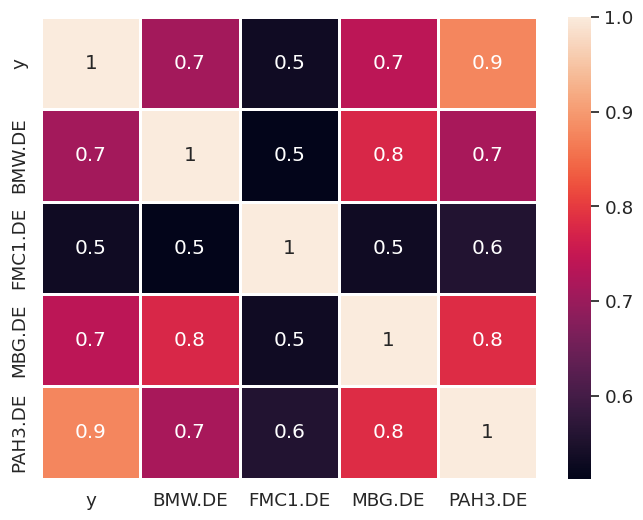

In [89]:
# Correlation Matrix
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.heatmap(differencing.corr(),
            annot = True,
            fmt = '.1g',
            linewidth = 1,
            linecolor = 'white')

In [98]:
# Prepare the Dataset
df_final = df.drop(columns = ['FMC1.DE'])
df_final.tail(15)

,y,BMW.DE,MBG.DE,PAH3.DE
Date,,,,
2015-06-24,128.380615,63.636345,51.954796,54.366447
2015-07-01,126.343803,60.862225,50.701107,53.560692
2015-07-08,123.936668,61.361298,53.030293,53.553509
2015-07-15,121.899849,61.665936,54.137608,53.301704
2015-07-22,117.764526,58.451061,51.452049,50.697414
2015-07-29,113.413162,58.904774,52.438446,49.934841
2015-08-05,113.444023,57.958458,50.866570,49.222603
2015-08-12,108.969208,55.657501,48.238285,47.992397
2015-08-19,104.370972,53.032440,45.158161,45.028389


In [99]:
# Prepare pre and post period
pre_period = ['2014-01-01', '2015-08-26']
pre_period

['2014-01-01', '2015-08-26']

In [102]:
post_period = ['2015-09-16', '2015-09-30']
post_period

['2015-09-16', '2015-09-30']

In [103]:
# Google Causal Impact
impact = CausalImpact(data = df_final,
                      pre_period = pre_period,
                      post_period = post_period)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`
Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.


- There was problem in the dates, I adjusted by assigning the dates by looking into the dataframe, Good Work!

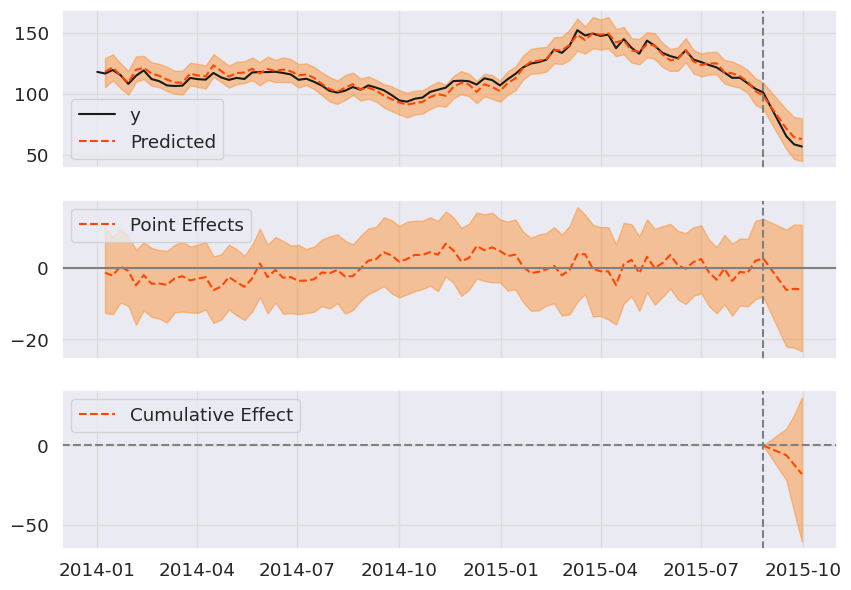

In [104]:
# Output
impact.plot()

In [105]:
# Summary
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    60.4               181.19
Prediction (s.d.)         66.44 (7.76)       199.31 (23.29)
95% CI                    [50.05, 80.47]     [150.14, 241.42]

Absolute effect (s.d.)    -6.04 (7.76)       -18.12 (23.29)
95% CI                    [-20.08, 10.35]    [-60.23, 31.05]

Relative effect (s.d.)    -9.09% (11.68%)    -9.09% (11.68%)
95% CI                    [-30.22%, 15.58%]  [-30.22%, 15.58%]

Posterior tail-area probability p: 0.23
Posterior prob. of a causal effect: 77.12%

For more details run the command: print(impact.summary('report'))


- As these are automotive stocks, they fell because they are correlated and the model also kind of agrees to the correlation.